In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.

session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 



# Calculate the date one year from the last date in data set.

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year




datetime.date(2016, 8, 23)

In [30]:
# Perform a query to retrieve the data and precipitation scores

last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year)
last_year_data


In [38]:

# Save the query results as a Pandas DataFrame and set the index to the date column

data_df = pd.DataFrame(last_year_data)
data_df.set_index('date')


,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [45]:

# Sort the dataframe by date
data_df = data_df.sort_values('date')
data_df = data_df.dropna(how="any")
data_df




,date,prcp
0,2016-08-24,0.08
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
1875,2016-08-24,1.45
...,...,...
1522,2017-08-22,0.00
359,2017-08-23,0.00
1005,2017-08-23,0.00
1523,2017-08-23,0.08


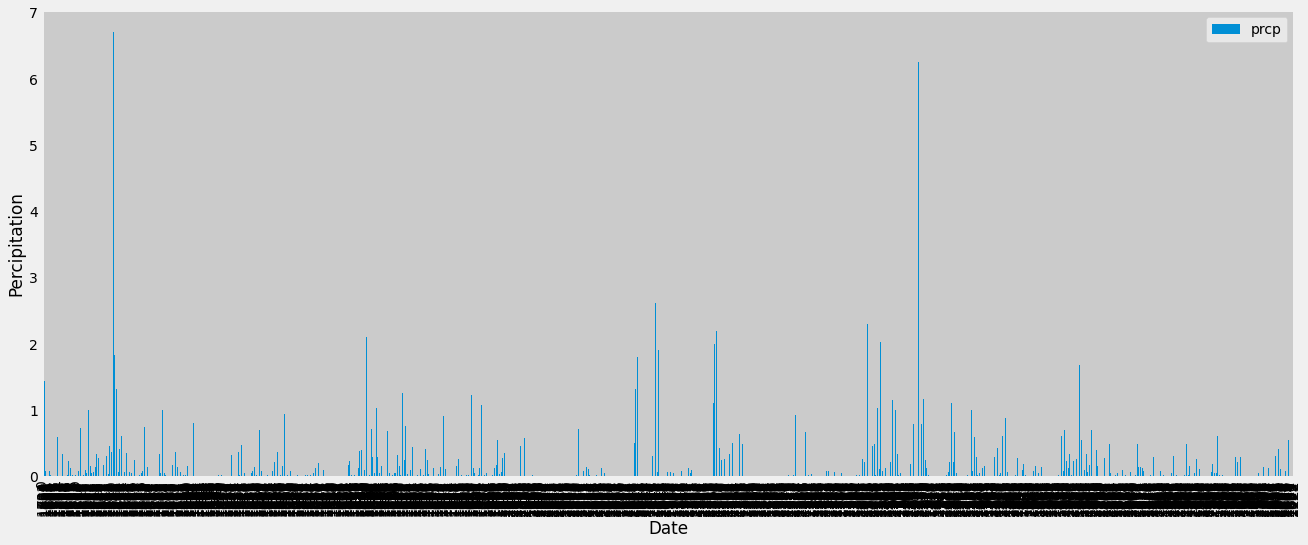

In [49]:
# Use Pandas Plotting with Matplotlib to plot the data

data_df.plot(kind="bar", figsize=(20,8))
plt.xlabel("Date")
plt.ylabel("Percipitation")
plt.show()


In [50]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [10]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()


9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by((func.count(Measurement.station)).desc()).all()

active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [Measurement.tobs, 
       func.max(Measurement.tobs), 
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs)]


station_averages = session.query(*sel).filter(Measurement.station == "USC00519281").all()
station_average
                          



<bound method Query.filter of <sqlalchemy.orm.query.Query object at 0x000002508A184908>>

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > last_year)



# Close session

In [ ]:
# Close Session
session.close()